In [1]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from src import ImageQuant2, load_image, nb_setup, raw_data_path

nb_setup()

%matplotlib widget

In [2]:
# Import cytoplasmic profile
cytbg = np.loadtxt("../../data/calibration_cyt.txt")

# Import embryos dataframe
df = pd.read_csv("../../data/par2_nebd_embryos.csv")

# Select 10 random wild type, C56S and L109R embryos
n = 10
df_wt = df[(df.Line == "lp637") * (df.RNAi == "wt")].sample(n)
df_c56s = df[(df.Line == "nwg240") * (df.RNAi == "wt")].sample(n)
df_l109r = df[(df.Line == "nwg338") * (df.RNAi == "wt")].sample(n)
df_l50r = df[(df.Line == "nwg400") * (df.RNAi == "wt")].sample(n)
df_het = df[(df.Line == "nwg325bal") * (df.RNAi == "wt")].sample(n)
df_sample = pd.concat([df_wt, df_c56s, df_l109r, df_l50r, df_het])

df_sample.to_csv("../../data/calibration_embryos.csv", index=False)

In [3]:
# Import data
df = pd.read_csv("../../data/calibration_embryos.csv")
if raw_data_path:
    df["Path"] = df["Path"].apply(lambda x: raw_data_path + x)
paths_wt = df[df.Line == "lp637"].Path.to_list()
paths_c56s = df[df.Line == "nwg240"].Path.to_list()
paths_l109r = df[df.Line == "nwg338"].Path.to_list()
paths_l50r = df[df.Line == "nwg400"].Path.to_list()
paths_het = df[df.Line == "nwg325bal"].Path.to_list()
print(len(paths_wt))

imgs_wt = [load_image(p + "/af_corrected.tif") for p in paths_wt]
imgs_c56s = [load_image(p + "/af_corrected.tif") for p in paths_c56s]
imgs_l109r = [load_image(p + "/af_corrected.tif") for p in paths_l109r]
imgs_l50r = [load_image(p + "/af_corrected.tif") for p in paths_l50r]
imgs_het = [load_image(p + "/af_corrected.tif") for p in paths_het]

rois_wt = [np.loadtxt(p + "/ROI_fit.txt") for p in paths_wt]
rois_c56s = [np.loadtxt(p + "/ROI_fit.txt") for p in paths_c56s]
rois_l109r = [np.loadtxt(p + "/ROI_fit.txt") for p in paths_l109r]
rois_l50r = [np.loadtxt(p + "/ROI_fit.txt") for p in paths_l50r]
rois_het = [np.loadtxt(p + "/ROI_fit.txt") for p in paths_het]

10


In [4]:
# Global calibration parameters
kwargs_dict = {"lr": 0.005, "descent_steps": 1000}

### Calibration 1 (WT)

  0%|                                                                                                                                            | 0/1000 [00:00<?, ?it/s]

  0%|▏                                                                                                                                   | 1/1000 [00:01<24:24,  1.47s/it]

  1%|▊                                                                                                                                   | 6/1000 [00:01<03:18,  5.02it/s]

  1%|█▋                                                                                                                                 | 13/1000 [00:01<01:20, 12.19it/s]

  2%|██▊                                                                                                                                | 21/1000 [00:01<00:46, 21.22it/s]

  3%|███▌                                                                                                                               | 27/1000 [00:01<00:35, 27.46it/s]

  3%|████▍                                                                                                                              | 34/1000 [00:02<00:27, 34.87it/s]

  4%|█████▏                                                                                                                             | 40/1000 [00:02<00:24, 39.86it/s]

  5%|██████▏                                                                                                                            | 47/1000 [00:02<00:21, 45.25it/s]

  5%|███████                                                                                                                            | 54/1000 [00:02<00:18, 50.96it/s]

  6%|███████▉                                                                                                                           | 61/1000 [00:02<00:17, 54.23it/s]

  7%|████████▉                                                                                                                          | 68/1000 [00:02<00:16, 57.62it/s]

  8%|█████████▊                                                                                                                         | 75/1000 [00:02<00:17, 52.48it/s]

  8%|██████████▋                                                                                                                        | 82/1000 [00:02<00:16, 55.01it/s]

  9%|███████████▌                                                                                                                       | 88/1000 [00:02<00:17, 51.47it/s]

 10%|████████████▍                                                                                                                      | 95/1000 [00:03<00:17, 51.46it/s]

 10%|█████████████▏                                                                                                                    | 101/1000 [00:03<00:17, 49.99it/s]

 11%|██████████████▏                                                                                                                   | 109/1000 [00:03<00:16, 55.43it/s]

 12%|██████████████▉                                                                                                                   | 115/1000 [00:03<00:15, 55.57it/s]

 12%|███████████████▊                                                                                                                  | 122/1000 [00:03<00:15, 58.19it/s]

 13%|████████████████▊                                                                                                                 | 129/1000 [00:03<00:14, 60.26it/s]

 14%|█████████████████▋                                                                                                                | 136/1000 [00:03<00:16, 52.02it/s]

 14%|██████████████████▌                                                                                                               | 143/1000 [00:03<00:15, 55.25it/s]

 15%|███████████████████▌                                                                                                              | 150/1000 [00:04<00:14, 57.15it/s]

 16%|████████████████████▎                                                                                                             | 156/1000 [00:04<00:14, 57.26it/s]

 16%|█████████████████████▏                                                                                                            | 163/1000 [00:04<00:14, 59.09it/s]

 17%|██████████████████████                                                                                                            | 170/1000 [00:04<00:13, 59.91it/s]

 18%|███████████████████████▏                                                                                                          | 178/1000 [00:04<00:12, 64.75it/s]

 18%|████████████████████████                                                                                                          | 185/1000 [00:04<00:14, 58.12it/s]

 19%|████████████████████████▊                                                                                                         | 191/1000 [00:04<00:14, 55.46it/s]

 20%|█████████████████████████▌                                                                                                        | 197/1000 [00:04<00:14, 55.00it/s]

 20%|██████████████████████████▍                                                                                                       | 203/1000 [00:05<00:15, 49.84it/s]

 21%|███████████████████████████▎                                                                                                      | 210/1000 [00:05<00:14, 54.24it/s]

 22%|████████████████████████████                                                                                                      | 216/1000 [00:05<00:14, 53.89it/s]

 22%|█████████████████████████████                                                                                                     | 224/1000 [00:05<00:13, 57.87it/s]

 23%|██████████████████████████████▏                                                                                                   | 232/1000 [00:05<00:12, 61.39it/s]

 24%|███████████████████████████████▏                                                                                                  | 240/1000 [00:05<00:11, 64.86it/s]

 25%|████████████████████████████████                                                                                                  | 247/1000 [00:05<00:13, 55.97it/s]

 25%|████████████████████████████████▉                                                                                                 | 253/1000 [00:05<00:13, 53.54it/s]

 26%|█████████████████████████████████▊                                                                                                | 260/1000 [00:05<00:13, 56.12it/s]

 27%|██████████████████████████████████▋                                                                                               | 267/1000 [00:06<00:12, 58.67it/s]

 28%|███████████████████████████████████▊                                                                                              | 275/1000 [00:06<00:11, 62.76it/s]

 28%|████████████████████████████████████▋                                                                                             | 282/1000 [00:06<00:11, 64.38it/s]

 29%|█████████████████████████████████████▌                                                                                            | 289/1000 [00:06<00:12, 55.97it/s]

 30%|██████████████████████████████████████▎                                                                                           | 295/1000 [00:06<00:12, 55.38it/s]

 30%|███████████████████████████████████████▎                                                                                          | 302/1000 [00:06<00:11, 58.39it/s]

 31%|████████████████████████████████████████▏                                                                                         | 309/1000 [00:06<00:11, 59.15it/s]

 32%|█████████████████████████████████████████                                                                                         | 316/1000 [00:06<00:11, 58.14it/s]

 32%|█████████████████████████████████████████▊                                                                                        | 322/1000 [00:07<00:13, 51.27it/s]

 33%|██████████████████████████████████████████▊                                                                                       | 329/1000 [00:07<00:12, 55.28it/s]

 34%|███████████████████████████████████████████▋                                                                                      | 336/1000 [00:07<00:11, 57.23it/s]

 34%|████████████████████████████████████████████▍                                                                                     | 342/1000 [00:07<00:11, 55.05it/s]

 35%|█████████████████████████████████████████████▏                                                                                    | 348/1000 [00:07<00:11, 55.82it/s]

 36%|██████████████████████████████████████████████▎                                                                                   | 356/1000 [00:07<00:10, 62.25it/s]

 36%|███████████████████████████████████████████████▏                                                                                  | 363/1000 [00:07<00:10, 60.82it/s]

 37%|████████████████████████████████████████████████                                                                                  | 370/1000 [00:07<00:11, 57.19it/s]

 38%|████████████████████████████████████████████████▉                                                                                 | 376/1000 [00:07<00:11, 56.24it/s]

 38%|█████████████████████████████████████████████████▊                                                                                | 383/1000 [00:08<00:10, 58.83it/s]

 39%|██████████████████████████████████████████████████▋                                                                               | 390/1000 [00:08<00:09, 61.23it/s]

 40%|███████████████████████████████████████████████████▌                                                                              | 397/1000 [00:08<00:09, 63.54it/s]

 40%|████████████████████████████████████████████████████▌                                                                             | 404/1000 [00:08<00:09, 64.48it/s]

 41%|█████████████████████████████████████████████████████▍                                                                            | 411/1000 [00:08<00:09, 64.11it/s]

 42%|██████████████████████████████████████████████████████▎                                                                           | 418/1000 [00:08<00:09, 61.42it/s]

 42%|███████████████████████████████████████████████████████▎                                                                          | 425/1000 [00:08<00:09, 62.70it/s]

 43%|████████████████████████████████████████████████████████▏                                                                         | 432/1000 [00:08<00:08, 64.05it/s]

 44%|█████████████████████████████████████████████████████████                                                                         | 439/1000 [00:08<00:09, 57.30it/s]

 45%|█████████████████████████████████████████████████████████▉                                                                        | 446/1000 [00:09<00:09, 59.88it/s]

 45%|███████████████████████████████████████████████████████████                                                                       | 454/1000 [00:09<00:08, 62.97it/s]

 46%|███████████████████████████████████████████████████████████▉                                                                      | 461/1000 [00:09<00:09, 59.15it/s]

 47%|████████████████████████████████████████████████████████████▉                                                                     | 469/1000 [00:09<00:08, 61.57it/s]

 48%|█████████████████████████████████████████████████████████████▉                                                                    | 476/1000 [00:09<00:09, 57.95it/s]

 48%|██████████████████████████████████████████████████████████████▊                                                                   | 483/1000 [00:09<00:08, 58.98it/s]

 49%|███████████████████████████████████████████████████████████████▊                                                                  | 491/1000 [00:09<00:08, 62.86it/s]

 50%|████████████████████████████████████████████████████████████████▋                                                                 | 498/1000 [00:09<00:08, 59.77it/s]

 50%|█████████████████████████████████████████████████████████████████▋                                                                | 505/1000 [00:10<00:09, 54.44it/s]

 51%|██████████████████████████████████████████████████████████████████▍                                                               | 511/1000 [00:10<00:09, 54.31it/s]

 52%|███████████████████████████████████████████████████████████████████▏                                                              | 517/1000 [00:10<00:08, 54.60it/s]

 52%|███████████████████████████████████████████████████████████████████▉                                                              | 523/1000 [00:10<00:08, 54.13it/s]

 53%|████████████████████████████████████████████████████████████████████▉                                                             | 530/1000 [00:10<00:08, 57.67it/s]

 54%|█████████████████████████████████████████████████████████████████████▋                                                            | 536/1000 [00:10<00:08, 52.71it/s]

 54%|██████████████████████████████████████████████████████████████████████▋                                                           | 544/1000 [00:10<00:07, 58.27it/s]

 55%|███████████████████████████████████████████████████████████████████████▋                                                          | 551/1000 [00:10<00:07, 61.07it/s]

 56%|████████████████████████████████████████████████████████████████████████▌                                                         | 558/1000 [00:11<00:07, 59.33it/s]

 56%|█████████████████████████████████████████████████████████████████████████▍                                                        | 565/1000 [00:11<00:07, 56.01it/s]

 57%|██████████████████████████████████████████████████████████████████████████▏                                                       | 571/1000 [00:11<00:08, 52.14it/s]

 58%|███████████████████████████████████████████████████████████████████████████                                                       | 577/1000 [00:11<00:07, 53.12it/s]

 58%|███████████████████████████████████████████████████████████████████████████▊                                                      | 583/1000 [00:11<00:08, 49.14it/s]

 59%|████████████████████████████████████████████████████████████████████████████▋                                                     | 590/1000 [00:11<00:07, 53.52it/s]

 60%|█████████████████████████████████████████████████████████████████████████████▍                                                    | 596/1000 [00:11<00:07, 52.18it/s]

 60%|██████████████████████████████████████████████████████████████████████████████▎                                                   | 602/1000 [00:11<00:08, 46.69it/s]

 61%|███████████████████████████████████████████████████████████████████████████████                                                   | 608/1000 [00:12<00:08, 48.21it/s]

 61%|███████████████████████████████████████████████████████████████████████████████▋                                                  | 613/1000 [00:12<00:08, 47.46it/s]

 62%|████████████████████████████████████████████████████████████████████████████████▌                                                 | 620/1000 [00:12<00:07, 52.29it/s]

 63%|█████████████████████████████████████████████████████████████████████████████████▊                                                | 629/1000 [00:12<00:06, 60.22it/s]

 64%|██████████████████████████████████████████████████████████████████████████████████▋                                               | 636/1000 [00:12<00:05, 62.31it/s]

 64%|███████████████████████████████████████████████████████████████████████████████████▌                                              | 643/1000 [00:12<00:05, 61.01it/s]

 65%|████████████████████████████████████████████████████████████████████████████████████▌                                             | 650/1000 [00:12<00:06, 50.35it/s]

 66%|█████████████████████████████████████████████████████████████████████████████████████▎                                            | 656/1000 [00:12<00:06, 51.05it/s]

 66%|██████████████████████████████████████████████████████████████████████████████████████                                            | 662/1000 [00:13<00:06, 50.38it/s]

 67%|██████████████████████████████████████████████████████████████████████████████████████▊                                           | 668/1000 [00:13<00:06, 48.11it/s]

 67%|███████████████████████████████████████████████████████████████████████████████████████▌                                          | 674/1000 [00:13<00:06, 49.64it/s]

 68%|████████████████████████████████████████████████████████████████████████████████████████▍                                         | 680/1000 [00:13<00:06, 49.83it/s]

 69%|█████████████████████████████████████████████████████████████████████████████████████████▏                                        | 686/1000 [00:13<00:07, 41.72it/s]

 69%|█████████████████████████████████████████████████████████████████████████████████████████▉                                        | 692/1000 [00:13<00:07, 43.92it/s]

 70%|██████████████████████████████████████████████████████████████████████████████████████████▋                                       | 698/1000 [00:13<00:06, 46.38it/s]

 70%|███████████████████████████████████████████████████████████████████████████████████████████▋                                      | 705/1000 [00:13<00:05, 50.75it/s]

 71%|████████████████████████████████████████████████████████████████████████████████████████████▍                                     | 711/1000 [00:14<00:05, 51.03it/s]

 72%|█████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 718/1000 [00:14<00:05, 55.17it/s]

 72%|██████████████████████████████████████████████████████████████████████████████████████████████                                    | 724/1000 [00:14<00:05, 54.62it/s]

 73%|███████████████████████████████████████████████████████████████████████████████████████████████                                   | 731/1000 [00:14<00:04, 58.47it/s]

 74%|███████████████████████████████████████████████████████████████████████████████████████████████▉                                  | 738/1000 [00:14<00:04, 61.04it/s]

 74%|████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 745/1000 [00:14<00:04, 58.63it/s]

 75%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                                | 752/1000 [00:14<00:04, 60.09it/s]

 76%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                               | 759/1000 [00:14<00:03, 61.30it/s]

 77%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                              | 766/1000 [00:14<00:03, 63.64it/s]

 77%|████████████████████████████████████████████████████████████████████████████████████████████████████▍                             | 773/1000 [00:15<00:03, 64.77it/s]

 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                            | 780/1000 [00:15<00:03, 65.37it/s]

 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                           | 787/1000 [00:15<00:03, 63.64it/s]

 79%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏                          | 794/1000 [00:15<00:03, 64.53it/s]

 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏                         | 801/1000 [00:15<00:03, 60.83it/s]

 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                         | 808/1000 [00:15<00:03, 58.45it/s]

 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 814/1000 [00:15<00:03, 55.12it/s]

 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋                       | 821/1000 [00:15<00:03, 56.79it/s]

 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 828/1000 [00:15<00:02, 58.67it/s]

 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                     | 835/1000 [00:16<00:02, 60.43it/s]

 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                    | 842/1000 [00:16<00:02, 61.69it/s]

 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                   | 849/1000 [00:16<00:02, 56.11it/s]

 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 855/1000 [00:16<00:02, 54.82it/s]

 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 861/1000 [00:16<00:02, 52.66it/s]

 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                 | 868/1000 [00:16<00:02, 56.46it/s]

 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                | 875/1000 [00:16<00:02, 58.32it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌               | 881/1000 [00:16<00:02, 55.49it/s]

 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 887/1000 [00:17<00:02, 55.52it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████              | 893/1000 [00:17<00:02, 48.01it/s]

 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 898/1000 [00:17<00:02, 42.32it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 904/1000 [00:17<00:02, 45.74it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 909/1000 [00:17<00:02, 45.16it/s]

 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 915/1000 [00:17<00:01, 46.63it/s]

 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 921/1000 [00:17<00:01, 41.07it/s]

 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 926/1000 [00:18<00:03, 19.61it/s]

 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 932/1000 [00:18<00:02, 24.68it/s]

 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 936/1000 [00:18<00:02, 24.01it/s]

 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 940/1000 [00:18<00:02, 25.26it/s]

 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊       | 945/1000 [00:19<00:01, 28.07it/s]

 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 950/1000 [00:19<00:01, 32.07it/s]

 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 957/1000 [00:19<00:01, 40.10it/s]

 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 962/1000 [00:19<00:00, 39.92it/s]

 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 967/1000 [00:19<00:00, 40.65it/s]

 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 972/1000 [00:19<00:00, 42.41it/s]

 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 978/1000 [00:19<00:00, 45.92it/s]

 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 984/1000 [00:19<00:00, 49.47it/s]

 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 990/1000 [00:19<00:00, 49.81it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 996/1000 [00:20<00:00, 49.63it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:20<00:00, 49.57it/s]

(<Figure size 960x720 with 1 Axes>,
 <Axes: xlabel='Descent step', ylabel='log10(Mean square error)'>)

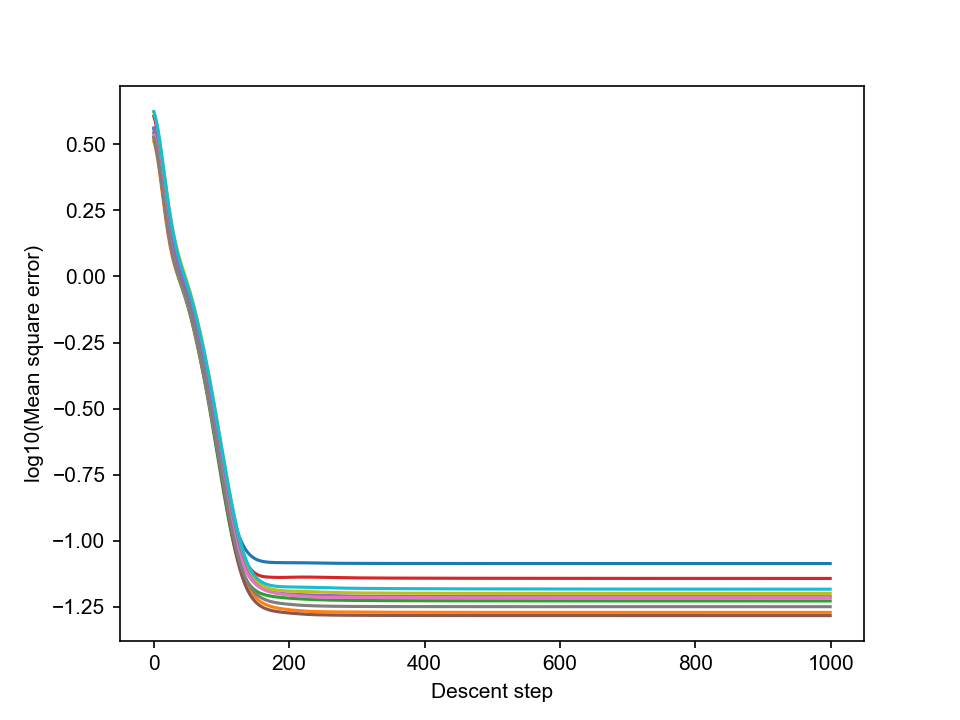

In [5]:
iq1 = ImageQuant2(img=imgs_wt, roi=rois_wt, cytbg=cytbg)
iq1.calibrate_membrane(**kwargs_dict)
iq1.plot_losses(log=True)

### Calibration 2 (C56S)

  0%|                                                                                                                                            | 0/1000 [00:00<?, ?it/s]

  0%|▏                                                                                                                                   | 1/1000 [00:00<13:56,  1.19it/s]

  1%|▊                                                                                                                                   | 6/1000 [00:01<03:30,  4.72it/s]

  1%|█▌                                                                                                                                 | 12/1000 [00:01<01:34, 10.42it/s]

  2%|██▏                                                                                                                                | 17/1000 [00:01<01:03, 15.46it/s]

  2%|███                                                                                                                                | 23/1000 [00:01<00:44, 21.91it/s]

  3%|███▊                                                                                                                               | 29/1000 [00:01<00:33, 28.70it/s]

  4%|████▋                                                                                                                              | 36/1000 [00:02<00:26, 35.93it/s]

  4%|█████▋                                                                                                                             | 43/1000 [00:02<00:22, 42.52it/s]

  5%|███████                                                                                                                            | 54/1000 [00:02<00:16, 57.33it/s]

  6%|████████▌                                                                                                                          | 65/1000 [00:02<00:13, 69.56it/s]

  8%|█████████▊                                                                                                                         | 75/1000 [00:02<00:11, 77.14it/s]

  9%|███████████▎                                                                                                                       | 86/1000 [00:02<00:10, 85.07it/s]

 10%|████████████▋                                                                                                                      | 97/1000 [00:02<00:09, 90.70it/s]

 11%|██████████████                                                                                                                    | 108/1000 [00:02<00:09, 95.87it/s]

 12%|███████████████▎                                                                                                                  | 118/1000 [00:02<00:09, 95.07it/s]

 13%|████████████████▋                                                                                                                 | 128/1000 [00:02<00:10, 87.18it/s]

 14%|█████████████████▉                                                                                                                | 138/1000 [00:03<00:10, 85.55it/s]

 15%|███████████████████▏                                                                                                              | 148/1000 [00:03<00:09, 88.03it/s]

 16%|████████████████████▋                                                                                                             | 159/1000 [00:03<00:09, 92.12it/s]

 17%|██████████████████████▏                                                                                                           | 171/1000 [00:03<00:08, 97.66it/s]

 18%|███████████████████████▍                                                                                                         | 182/1000 [00:03<00:08, 100.41it/s]

 19%|████████████████████████▉                                                                                                        | 193/1000 [00:03<00:07, 101.31it/s]

 20%|██████████████████████████▎                                                                                                      | 204/1000 [00:03<00:07, 100.20it/s]

 22%|███████████████████████████▋                                                                                                     | 215/1000 [00:03<00:07, 100.24it/s]

 23%|█████████████████████████████▍                                                                                                    | 226/1000 [00:03<00:08, 96.39it/s]

 24%|██████████████████████████████▋                                                                                                   | 236/1000 [00:04<00:09, 82.83it/s]

 24%|███████████████████████████████▊                                                                                                  | 245/1000 [00:04<00:08, 84.56it/s]

 26%|█████████████████████████████████▏                                                                                                | 255/1000 [00:04<00:08, 87.58it/s]

 26%|██████████████████████████████████▎                                                                                               | 264/1000 [00:04<00:08, 84.22it/s]

 28%|███████████████████████████████████▊                                                                                              | 275/1000 [00:04<00:08, 89.79it/s]

 29%|█████████████████████████████████████▏                                                                                            | 286/1000 [00:04<00:07, 94.56it/s]

 30%|██████████████████████████████████████▌                                                                                           | 297/1000 [00:04<00:07, 98.62it/s]

 31%|███████████████████████████████████████▋                                                                                         | 308/1000 [00:04<00:06, 100.03it/s]

 32%|█████████████████████████████████████████▍                                                                                        | 319/1000 [00:05<00:07, 90.91it/s]

 33%|██████████████████████████████████████████▊                                                                                       | 329/1000 [00:05<00:07, 84.14it/s]

 34%|███████████████████████████████████████████▉                                                                                      | 338/1000 [00:05<00:09, 68.45it/s]

 35%|████████████████████████████████████████████▉                                                                                     | 346/1000 [00:05<00:09, 66.71it/s]

 35%|██████████████████████████████████████████████                                                                                    | 354/1000 [00:05<00:10, 61.17it/s]

 36%|██████████████████████████████████████████████▉                                                                                   | 361/1000 [00:05<00:12, 52.95it/s]

 37%|███████████████████████████████████████████████▋                                                                                  | 367/1000 [00:05<00:12, 52.40it/s]

 37%|████████████████████████████████████████████████▍                                                                                 | 373/1000 [00:06<00:12, 51.45it/s]

 38%|█████████████████████████████████████████████████▍                                                                                | 380/1000 [00:06<00:11, 55.13it/s]

 39%|██████████████████████████████████████████████████▎                                                                               | 387/1000 [00:06<00:10, 57.95it/s]

 40%|███████████████████████████████████████████████████▎                                                                              | 395/1000 [00:06<00:09, 63.38it/s]

 40%|████████████████████████████████████████████████████▍                                                                             | 403/1000 [00:06<00:09, 66.05it/s]

 41%|█████████████████████████████████████████████████████▌                                                                            | 412/1000 [00:06<00:08, 69.49it/s]

 42%|██████████████████████████████████████████████████████▌                                                                           | 420/1000 [00:06<00:09, 60.79it/s]

 43%|███████████████████████████████████████████████████████▌                                                                          | 427/1000 [00:06<00:09, 62.86it/s]

 43%|████████████████████████████████████████████████████████▍                                                                         | 434/1000 [00:07<00:09, 62.86it/s]

 44%|█████████████████████████████████████████████████████████▎                                                                        | 441/1000 [00:07<00:09, 61.46it/s]

 45%|██████████████████████████████████████████████████████████▏                                                                       | 448/1000 [00:07<00:08, 63.41it/s]

 46%|███████████████████████████████████████████████████████████▏                                                                      | 455/1000 [00:07<00:08, 61.34it/s]

 46%|████████████████████████████████████████████████████████████                                                                      | 462/1000 [00:07<00:09, 59.55it/s]

 47%|████████████████████████████████████████████████████████████▉                                                                     | 469/1000 [00:07<00:10, 53.00it/s]

 48%|█████████████████████████████████████████████████████████████▊                                                                    | 475/1000 [00:07<00:11, 46.64it/s]

 48%|██████████████████████████████████████████████████████████████▍                                                                   | 480/1000 [00:07<00:11, 47.07it/s]

 49%|███████████████████████████████████████████████████████████████▌                                                                  | 489/1000 [00:08<00:08, 57.13it/s]

 50%|████████████████████████████████████████████████████████████████▌                                                                 | 497/1000 [00:08<00:09, 55.29it/s]

 50%|█████████████████████████████████████████████████████████████████▌                                                                | 504/1000 [00:08<00:09, 54.61it/s]

 51%|██████████████████████████████████████████████████████████████████▌                                                               | 512/1000 [00:08<00:08, 56.56it/s]

 52%|███████████████████████████████████████████████████████████████████▌                                                              | 520/1000 [00:08<00:08, 59.85it/s]

 53%|████████████████████████████████████████████████████████████████████▋                                                             | 528/1000 [00:08<00:07, 64.24it/s]

 54%|█████████████████████████████████████████████████████████████████████▌                                                            | 535/1000 [00:08<00:07, 61.94it/s]

 54%|██████████████████████████████████████████████████████████████████████▋                                                           | 544/1000 [00:08<00:07, 63.37it/s]

 55%|████████████████████████████████████████████████████████████████████████                                                          | 554/1000 [00:09<00:06, 72.00it/s]

 56%|█████████████████████████████████████████████████████████████████████████                                                         | 562/1000 [00:09<00:06, 69.30it/s]

 57%|██████████████████████████████████████████████████████████████████████████▎                                                       | 572/1000 [00:09<00:05, 75.79it/s]

 58%|███████████████████████████████████████████████████████████████████████████▋                                                      | 582/1000 [00:09<00:05, 80.53it/s]

 59%|████████████████████████████████████████████████████████████████████████████▉                                                     | 592/1000 [00:09<00:04, 84.30it/s]

 60%|██████████████████████████████████████████████████████████████████████████████▍                                                   | 603/1000 [00:09<00:04, 89.03it/s]

 61%|███████████████████████████████████████████████████████████████████████████████▌                                                  | 612/1000 [00:09<00:04, 85.33it/s]

 62%|████████████████████████████████████████████████████████████████████████████████▋                                                 | 621/1000 [00:09<00:04, 86.51it/s]

 63%|█████████████████████████████████████████████████████████████████████████████████▉                                                | 630/1000 [00:09<00:04, 87.11it/s]

 64%|███████████████████████████████████████████████████████████████████████████████████                                               | 639/1000 [00:10<00:04, 86.82it/s]

 65%|████████████████████████████████████████████████████████████████████████████████████▌                                             | 650/1000 [00:10<00:03, 91.40it/s]

 66%|█████████████████████████████████████████████████████████████████████████████████████▊                                            | 660/1000 [00:10<00:04, 82.70it/s]

 67%|██████████████████████████████████████████████████████████████████████████████████████▉                                           | 669/1000 [00:10<00:04, 80.10it/s]

 68%|████████████████████████████████████████████████████████████████████████████████████████▏                                         | 678/1000 [00:10<00:04, 78.20it/s]

 69%|█████████████████████████████████████████████████████████████████████████████████████████▌                                        | 689/1000 [00:10<00:03, 84.58it/s]

 70%|██████████████████████████████████████████████████████████████████████████████████████████▊                                       | 699/1000 [00:10<00:03, 87.07it/s]

 71%|████████████████████████████████████████████████████████████████████████████████████████████                                      | 708/1000 [00:10<00:03, 83.01it/s]

 72%|█████████████████████████████████████████████████████████████████████████████████████████████▏                                    | 717/1000 [00:10<00:03, 83.11it/s]

 73%|██████████████████████████████████████████████████████████████████████████████████████████████▍                                   | 726/1000 [00:11<00:03, 74.41it/s]

 73%|███████████████████████████████████████████████████████████████████████████████████████████████▍                                  | 734/1000 [00:11<00:03, 73.40it/s]

 74%|████████████████████████████████████████████████████████████████████████████████████████████████▍                                 | 742/1000 [00:11<00:03, 72.56it/s]

 75%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                                | 752/1000 [00:11<00:03, 79.54it/s]

 76%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                               | 761/1000 [00:11<00:03, 73.82it/s]

 77%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                             | 771/1000 [00:11<00:02, 79.08it/s]

 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                            | 780/1000 [00:11<00:03, 67.21it/s]

 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                           | 790/1000 [00:11<00:02, 74.58it/s]

 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████                          | 800/1000 [00:12<00:02, 80.69it/s]

 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏                        | 809/1000 [00:12<00:02, 70.24it/s]

 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏                       | 817/1000 [00:12<00:02, 67.35it/s]

 82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎                      | 825/1000 [00:12<00:02, 59.65it/s]

 83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                     | 832/1000 [00:12<00:02, 56.52it/s]

 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                    | 843/1000 [00:12<00:02, 68.25it/s]

 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 851/1000 [00:12<00:02, 70.02it/s]

 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 859/1000 [00:13<00:02, 62.59it/s]

 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 866/1000 [00:13<00:02, 60.65it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                | 873/1000 [00:13<00:02, 61.72it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 882/1000 [00:13<00:01, 67.92it/s]

 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 891/1000 [00:13<00:01, 68.46it/s]

 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 898/1000 [00:13<00:01, 67.80it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 910/1000 [00:13<00:01, 81.24it/s]

 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 919/1000 [00:13<00:01, 80.00it/s]

 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 928/1000 [00:13<00:00, 76.00it/s]

 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████        | 939/1000 [00:14<00:00, 82.19it/s]

 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 948/1000 [00:14<00:00, 74.43it/s]

 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 956/1000 [00:14<00:00, 65.59it/s]

 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 963/1000 [00:14<00:00, 61.74it/s]

 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████    | 970/1000 [00:14<00:00, 60.78it/s]

 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 980/1000 [00:14<00:00, 68.96it/s]

 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 991/1000 [00:14<00:00, 78.89it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 66.81it/s]

(<Figure size 960x720 with 1 Axes>,
 <Axes: xlabel='Descent step', ylabel='log10(Mean square error)'>)

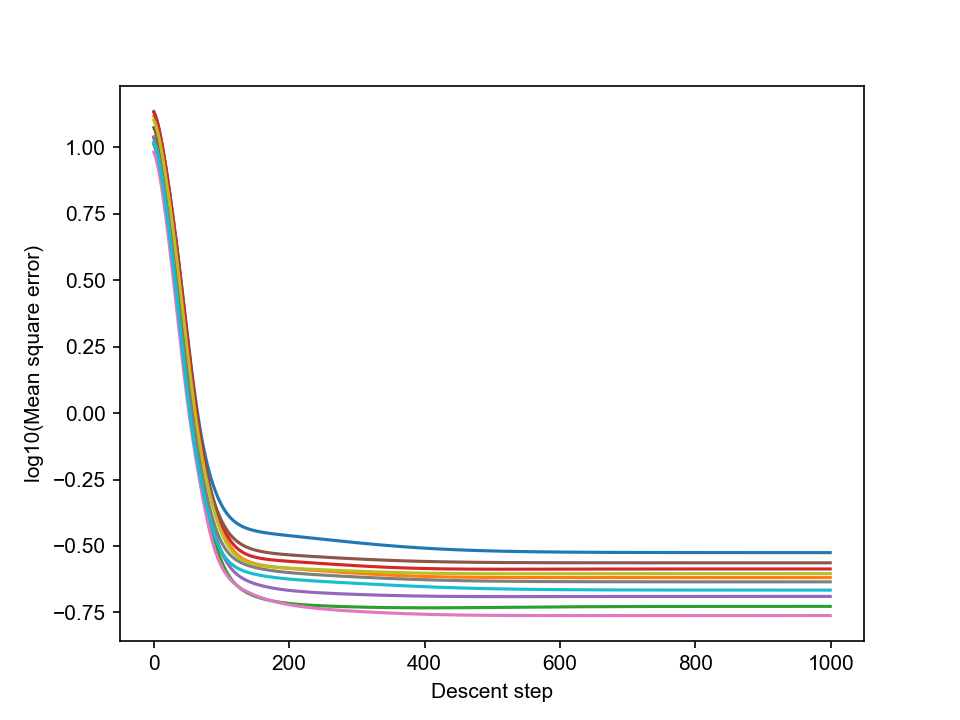

In [6]:
iq2 = ImageQuant2(img=imgs_c56s, roi=rois_c56s, cytbg=cytbg)
iq2.calibrate_membrane(**kwargs_dict)
iq2.plot_losses(log=True)

### Calibration 3 (L109R)

  0%|                                                                                                                                            | 0/1000 [00:00<?, ?it/s]

  0%|▏                                                                                                                                   | 1/1000 [00:00<14:03,  1.18it/s]

  1%|█▏                                                                                                                                  | 9/1000 [00:00<01:19, 12.48it/s]

  2%|██▌                                                                                                                                | 20/1000 [00:01<00:34, 28.82it/s]

  3%|████                                                                                                                               | 31/1000 [00:01<00:22, 44.02it/s]

  4%|█████▋                                                                                                                             | 43/1000 [00:01<00:16, 58.90it/s]

  5%|███████                                                                                                                            | 54/1000 [00:01<00:13, 69.40it/s]

  7%|████████▋                                                                                                                          | 66/1000 [00:01<00:11, 81.02it/s]

  8%|██████████                                                                                                                         | 77/1000 [00:01<00:10, 86.77it/s]

  9%|███████████▋                                                                                                                       | 89/1000 [00:01<00:09, 93.00it/s]

 10%|█████████████                                                                                                                     | 100/1000 [00:01<00:09, 97.29it/s]

 11%|██████████████▍                                                                                                                   | 111/1000 [00:01<00:08, 99.17it/s]

 12%|███████████████▋                                                                                                                 | 122/1000 [00:02<00:08, 100.57it/s]

 13%|█████████████████▏                                                                                                               | 133/1000 [00:02<00:08, 101.96it/s]

 14%|██████████████████▌                                                                                                              | 144/1000 [00:02<00:08, 103.50it/s]

 16%|███████████████████▉                                                                                                             | 155/1000 [00:02<00:08, 102.61it/s]

 17%|█████████████████████▍                                                                                                           | 166/1000 [00:02<00:08, 101.42it/s]

 18%|██████████████████████▊                                                                                                          | 177/1000 [00:02<00:07, 103.73it/s]

 19%|████████████████████████▍                                                                                                        | 189/1000 [00:02<00:07, 108.32it/s]

 20%|██████████████████████████                                                                                                       | 202/1000 [00:02<00:07, 112.55it/s]

 21%|███████████████████████████▌                                                                                                     | 214/1000 [00:02<00:06, 113.40it/s]

 23%|█████████████████████████████▏                                                                                                   | 226/1000 [00:02<00:06, 113.05it/s]

 24%|██████████████████████████████▋                                                                                                  | 238/1000 [00:03<00:07, 106.23it/s]

 25%|████████████████████████████████▎                                                                                                | 250/1000 [00:03<00:06, 108.12it/s]

 26%|█████████████████████████████████▋                                                                                               | 261/1000 [00:03<00:06, 106.63it/s]

 27%|███████████████████████████████████▎                                                                                              | 272/1000 [00:03<00:08, 89.24it/s]

 28%|████████████████████████████████████▋                                                                                             | 282/1000 [00:03<00:08, 83.91it/s]

 29%|█████████████████████████████████████▊                                                                                            | 291/1000 [00:03<00:08, 83.75it/s]

 30%|███████████████████████████████████████                                                                                           | 300/1000 [00:03<00:08, 81.87it/s]

 31%|████████████████████████████████████████▏                                                                                         | 309/1000 [00:03<00:09, 75.60it/s]

 32%|█████████████████████████████████████████▍                                                                                        | 319/1000 [00:04<00:08, 80.65it/s]

 33%|██████████████████████████████████████████▋                                                                                       | 328/1000 [00:04<00:08, 82.87it/s]

 34%|████████████████████████████████████████████                                                                                      | 339/1000 [00:04<00:07, 89.11it/s]

 35%|█████████████████████████████████████████████▌                                                                                    | 350/1000 [00:04<00:06, 93.45it/s]

 36%|██████████████████████████████████████████████▉                                                                                   | 361/1000 [00:04<00:06, 97.67it/s]

 37%|███████████████████████████████████████████████▉                                                                                 | 372/1000 [00:04<00:06, 100.09it/s]

 38%|█████████████████████████████████████████████████▌                                                                               | 384/1000 [00:04<00:05, 103.56it/s]

 40%|██████████████████████████████████████████████████▉                                                                              | 395/1000 [00:04<00:06, 100.30it/s]

 41%|████████████████████████████████████████████████████▌                                                                            | 407/1000 [00:04<00:05, 103.38it/s]

 42%|██████████████████████████████████████████████████████                                                                           | 419/1000 [00:05<00:05, 106.24it/s]

 43%|███████████████████████████████████████████████████████▌                                                                         | 431/1000 [00:05<00:05, 108.25it/s]

 44%|█████████████████████████████████████████████████████████▏                                                                       | 443/1000 [00:05<00:05, 110.33it/s]

 46%|██████████████████████████████████████████████████████████▋                                                                      | 455/1000 [00:05<00:04, 111.21it/s]

 47%|████████████████████████████████████████████████████████████▏                                                                    | 467/1000 [00:05<00:04, 111.51it/s]

 48%|█████████████████████████████████████████████████████████████▊                                                                   | 479/1000 [00:05<00:05, 102.18it/s]

 49%|███████████████████████████████████████████████████████████████▋                                                                  | 490/1000 [00:05<00:05, 99.30it/s]

 50%|████████████████████████████████████████████████████████████████▊                                                                | 502/1000 [00:05<00:04, 103.59it/s]

 51%|██████████████████████████████████████████████████████████████████▏                                                              | 513/1000 [00:05<00:04, 103.91it/s]

 52%|███████████████████████████████████████████████████████████████████▋                                                             | 525/1000 [00:06<00:04, 107.11it/s]

 54%|█████████████████████████████████████████████████████████████████████▎                                                           | 537/1000 [00:06<00:04, 109.45it/s]

 55%|██████████████████████████████████████████████████████████████████████▊                                                          | 549/1000 [00:06<00:04, 108.65it/s]

 56%|████████████████████████████████████████████████████████████████████████▏                                                        | 560/1000 [00:06<00:04, 107.07it/s]

 57%|█████████████████████████████████████████████████████████████████████████▋                                                       | 571/1000 [00:06<00:04, 100.68it/s]

 58%|███████████████████████████████████████████████████████████████████████████▋                                                      | 582/1000 [00:06<00:05, 78.74it/s]

 59%|████████████████████████████████████████████████████████████████████████████▊                                                     | 591/1000 [00:06<00:05, 79.27it/s]

 60%|██████████████████████████████████████████████████████████████████████████████                                                    | 600/1000 [00:06<00:05, 74.02it/s]

 61%|███████████████████████████████████████████████████████████████████████████████                                                   | 608/1000 [00:07<00:05, 66.82it/s]

 62%|████████████████████████████████████████████████████████████████████████████████                                                  | 616/1000 [00:07<00:06, 63.83it/s]

 62%|████████████████████████████████████████████████████████████████████████████████▉                                                 | 623/1000 [00:07<00:06, 62.33it/s]

 63%|██████████████████████████████████████████████████████████████████████████████████▎                                               | 633/1000 [00:07<00:05, 69.72it/s]

 64%|███████████████████████████████████████████████████████████████████████████████████▎                                              | 641/1000 [00:07<00:05, 67.92it/s]

 65%|████████████████████████████████████████████████████████████████████████████████████▎                                             | 649/1000 [00:07<00:05, 68.16it/s]

 66%|█████████████████████████████████████████████████████████████████████████████████████▋                                            | 659/1000 [00:07<00:04, 75.09it/s]

 67%|███████████████████████████████████████████████████████████████████████████████████████▎                                          | 672/1000 [00:07<00:03, 88.09it/s]

 68%|████████████████████████████████████████████████████████████████████████████████████████▉                                         | 684/1000 [00:08<00:03, 95.64it/s]

 70%|█████████████████████████████████████████████████████████████████████████████████████████▊                                       | 696/1000 [00:08<00:03, 100.89it/s]

 71%|███████████████████████████████████████████████████████████████████████████████████████████▎                                     | 708/1000 [00:08<00:02, 104.85it/s]

 72%|█████████████████████████████████████████████████████████████████████████████████████████████▍                                    | 719/1000 [00:08<00:02, 97.62it/s]

 73%|██████████████████████████████████████████████████████████████████████████████████████████████▏                                  | 730/1000 [00:08<00:02, 100.89it/s]

 74%|███████████████████████████████████████████████████████████████████████████████████████████████▌                                 | 741/1000 [00:08<00:02, 101.57it/s]

 75%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                               | 753/1000 [00:08<00:02, 105.76it/s]

 76%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                              | 765/1000 [00:08<00:02, 107.73it/s]

 78%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                            | 777/1000 [00:08<00:02, 110.36it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊                           | 789/1000 [00:09<00:01, 110.95it/s]

 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎                         | 801/1000 [00:09<00:01, 112.26it/s]

 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉                        | 813/1000 [00:09<00:01, 106.70it/s]

 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍                      | 825/1000 [00:09<00:01, 108.86it/s]

 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉                     | 837/1000 [00:09<00:01, 111.10it/s]

 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 849/1000 [00:09<00:01, 112.05it/s]

 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                  | 861/1000 [00:09<00:01, 112.16it/s]

 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 873/1000 [00:09<00:01, 114.38it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 885/1000 [00:09<00:00, 115.66it/s]

 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 897/1000 [00:09<00:00, 116.10it/s]

 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 909/1000 [00:10<00:00, 111.57it/s]

 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 921/1000 [00:10<00:00, 113.49it/s]

 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 933/1000 [00:10<00:00, 114.57it/s]

 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 945/1000 [00:10<00:00, 113.51it/s]

 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 957/1000 [00:10<00:00, 106.91it/s]

 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 968/1000 [00:10<00:00, 104.57it/s]

 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 980/1000 [00:10<00:00, 106.92it/s]

 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 992/1000 [00:10<00:00, 108.53it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 91.64it/s]

(<Figure size 960x720 with 1 Axes>,
 <Axes: xlabel='Descent step', ylabel='log10(Mean square error)'>)

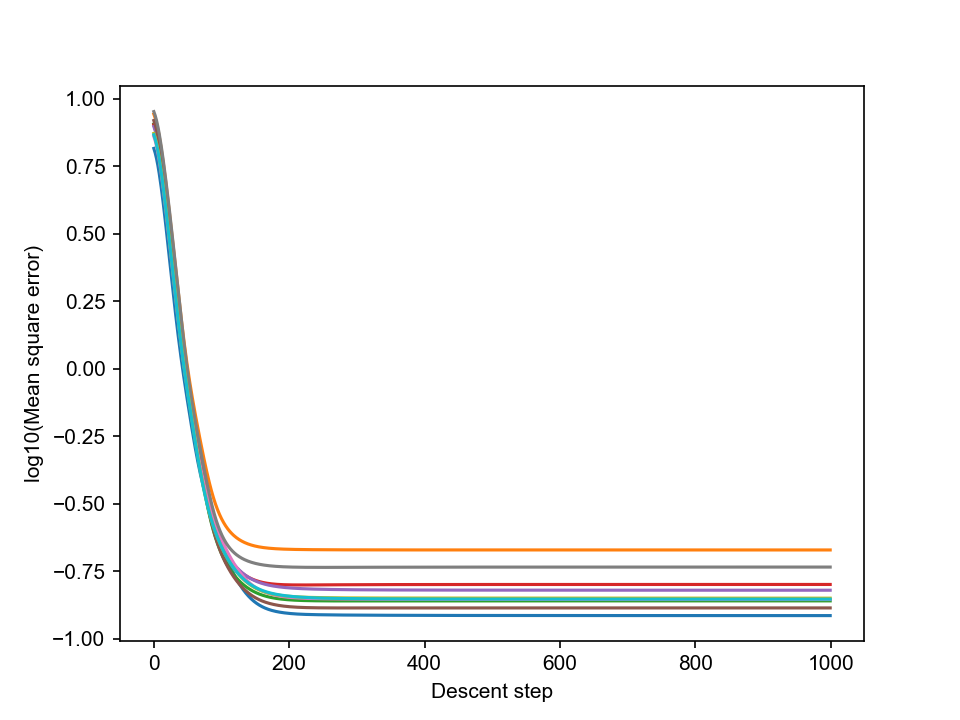

In [7]:
iq3 = ImageQuant2(img=imgs_l109r, roi=rois_l109r, cytbg=cytbg)
iq3.calibrate_membrane(**kwargs_dict)
iq3.plot_losses(log=True)

### Calibration 4 (L50R)

  0%|                                                                                                                                            | 0/1000 [00:00<?, ?it/s]

  0%|▏                                                                                                                                   | 1/1000 [00:00<08:14,  2.02it/s]

  1%|█▌                                                                                                                                 | 12/1000 [00:00<00:38, 25.69it/s]

  2%|███▏                                                                                                                               | 24/1000 [00:00<00:20, 47.58it/s]

  4%|████▋                                                                                                                              | 36/1000 [00:00<00:14, 64.51it/s]

  5%|██████▏                                                                                                                            | 47/1000 [00:00<00:12, 75.38it/s]

  6%|███████▍                                                                                                                           | 57/1000 [00:01<00:12, 73.04it/s]

  7%|████████▋                                                                                                                          | 66/1000 [00:01<00:12, 77.35it/s]

  8%|█████████▊                                                                                                                         | 75/1000 [00:01<00:11, 79.41it/s]

  8%|███████████                                                                                                                        | 84/1000 [00:01<00:11, 80.80it/s]

 10%|████████████▌                                                                                                                      | 96/1000 [00:01<00:09, 90.52it/s]

 11%|█████████████▉                                                                                                                    | 107/1000 [00:01<00:09, 93.67it/s]

 12%|███████████████▏                                                                                                                  | 117/1000 [00:01<00:10, 88.21it/s]

 13%|████████████████▋                                                                                                                 | 128/1000 [00:01<00:09, 93.72it/s]

 14%|██████████████████                                                                                                                | 139/1000 [00:01<00:08, 97.60it/s]

 15%|███████████████████▎                                                                                                              | 149/1000 [00:02<00:10, 81.62it/s]

 16%|████████████████████▌                                                                                                             | 158/1000 [00:02<00:11, 73.89it/s]

 17%|█████████████████████▌                                                                                                            | 166/1000 [00:02<00:11, 72.58it/s]

 18%|██████████████████████▊                                                                                                           | 175/1000 [00:02<00:10, 76.80it/s]

 18%|███████████████████████▊                                                                                                          | 183/1000 [00:02<00:12, 64.63it/s]

 19%|████████████████████████▉                                                                                                         | 192/1000 [00:02<00:11, 69.82it/s]

 20%|██████████████████████████                                                                                                        | 200/1000 [00:02<00:11, 69.73it/s]

 21%|███████████████████████████                                                                                                       | 208/1000 [00:02<00:11, 71.05it/s]

 22%|████████████████████████████▌                                                                                                     | 220/1000 [00:03<00:09, 82.22it/s]

 23%|██████████████████████████████▏                                                                                                   | 232/1000 [00:03<00:08, 91.78it/s]

 24%|███████████████████████████████▋                                                                                                  | 244/1000 [00:03<00:07, 98.15it/s]

 26%|█████████████████████████████████▏                                                                                                | 255/1000 [00:03<00:07, 98.36it/s]

 26%|██████████████████████████████████▍                                                                                               | 265/1000 [00:03<00:08, 87.10it/s]

 28%|███████████████████████████████████▉                                                                                              | 276/1000 [00:03<00:07, 91.32it/s]

 29%|█████████████████████████████████████▍                                                                                            | 288/1000 [00:03<00:07, 98.34it/s]

 30%|██████████████████████████████████████▊                                                                                           | 299/1000 [00:03<00:07, 93.17it/s]

 31%|████████████████████████████████████████▏                                                                                         | 309/1000 [00:04<00:08, 78.21it/s]

 32%|█████████████████████████████████████████▎                                                                                        | 318/1000 [00:04<00:09, 68.72it/s]

 33%|██████████████████████████████████████████▍                                                                                       | 326/1000 [00:04<00:09, 68.00it/s]

 33%|███████████████████████████████████████████▍                                                                                      | 334/1000 [00:04<00:09, 69.19it/s]

 34%|████████████████████████████████████████████▍                                                                                     | 342/1000 [00:04<00:09, 66.98it/s]

 35%|█████████████████████████████████████████████▎                                                                                    | 349/1000 [00:04<00:12, 50.91it/s]

 36%|██████████████████████████████████████████████▏                                                                                   | 355/1000 [00:05<00:13, 46.69it/s]

 36%|██████████████████████████████████████████████▉                                                                                   | 361/1000 [00:05<00:13, 48.33it/s]

 37%|███████████████████████████████████████████████▋                                                                                  | 367/1000 [00:05<00:12, 50.56it/s]

 37%|████████████████████████████████████████████████▌                                                                                 | 374/1000 [00:05<00:11, 55.20it/s]

 38%|█████████████████████████████████████████████████▌                                                                                | 381/1000 [00:05<00:10, 58.31it/s]

 39%|██████████████████████████████████████████████████▍                                                                               | 388/1000 [00:05<00:09, 61.38it/s]

 40%|███████████████████████████████████████████████████▎                                                                              | 395/1000 [00:05<00:09, 63.49it/s]

 40%|████████████████████████████████████████████████████▎                                                                             | 402/1000 [00:05<00:09, 62.56it/s]

 41%|█████████████████████████████████████████████████████▏                                                                            | 409/1000 [00:05<00:09, 64.23it/s]

 42%|██████████████████████████████████████████████████████                                                                            | 416/1000 [00:05<00:09, 64.78it/s]

 42%|███████████████████████████████████████████████████████                                                                           | 424/1000 [00:06<00:08, 67.35it/s]

 43%|████████████████████████████████████████████████████████▏                                                                         | 432/1000 [00:06<00:08, 70.72it/s]

 44%|█████████████████████████████████████████████████████████▎                                                                        | 441/1000 [00:06<00:07, 75.61it/s]

 45%|██████████████████████████████████████████████████████████▌                                                                       | 450/1000 [00:06<00:07, 78.03it/s]

 46%|███████████████████████████████████████████████████████████▌                                                                      | 458/1000 [00:06<00:07, 74.71it/s]

 47%|████████████████████████████████████████████████████████████▌                                                                     | 466/1000 [00:06<00:07, 70.32it/s]

 47%|█████████████████████████████████████████████████████████████▌                                                                    | 474/1000 [00:06<00:07, 72.14it/s]

 48%|██████████████████████████████████████████████████████████████▋                                                                   | 482/1000 [00:07<00:10, 48.13it/s]

 49%|███████████████████████████████████████████████████████████████▍                                                                  | 488/1000 [00:07<00:13, 38.89it/s]

 49%|████████████████████████████████████████████████████████████████                                                                  | 493/1000 [00:07<00:14, 35.53it/s]

 50%|████████████████████████████████████████████████████████████████▋                                                                 | 498/1000 [00:07<00:13, 37.21it/s]

 50%|█████████████████████████████████████████████████████████████████▋                                                                | 505/1000 [00:07<00:11, 42.16it/s]

 51%|██████████████████████████████████████████████████████████████████▌                                                               | 512/1000 [00:07<00:10, 46.86it/s]

 52%|███████████████████████████████████████████████████████████████████▍                                                              | 519/1000 [00:07<00:09, 51.06it/s]

 53%|████████████████████████████████████████████████████████████████████▌                                                             | 527/1000 [00:08<00:08, 56.51it/s]

 54%|█████████████████████████████████████████████████████████████████████▌                                                            | 535/1000 [00:08<00:07, 60.34it/s]

 54%|██████████████████████████████████████████████████████████████████████▌                                                           | 543/1000 [00:08<00:07, 63.68it/s]

 55%|███████████████████████████████████████████████████████████████████████▌                                                          | 550/1000 [00:08<00:07, 64.17it/s]

 56%|████████████████████████████████████████████████████████████████████████▍                                                         | 557/1000 [00:08<00:06, 65.64it/s]

 56%|█████████████████████████████████████████████████████████████████████████▎                                                        | 564/1000 [00:08<00:06, 66.39it/s]

 57%|██████████████████████████████████████████████████████████████████████████▏                                                       | 571/1000 [00:08<00:06, 64.43it/s]

 58%|███████████████████████████████████████████████████████████████████████████▏                                                      | 578/1000 [00:08<00:06, 61.48it/s]

 58%|████████████████████████████████████████████████████████████████████████████                                                      | 585/1000 [00:09<00:09, 45.68it/s]

 59%|████████████████████████████████████████████████████████████████████████████▊                                                     | 591/1000 [00:09<00:11, 35.64it/s]

 60%|█████████████████████████████████████████████████████████████████████████████▌                                                    | 597/1000 [00:09<00:10, 39.22it/s]

 60%|██████████████████████████████████████████████████████████████████████████████▍                                                   | 603/1000 [00:09<00:09, 43.10it/s]

 61%|███████████████████████████████████████████████████████████████████████████████▎                                                  | 610/1000 [00:09<00:08, 48.29it/s]

 62%|████████████████████████████████████████████████████████████████████████████████▏                                                 | 617/1000 [00:09<00:07, 52.63it/s]

 62%|█████████████████████████████████████████████████████████████████████████████████                                                 | 624/1000 [00:09<00:06, 55.82it/s]

 63%|██████████████████████████████████████████████████████████████████████████████████                                                | 631/1000 [00:09<00:06, 58.81it/s]

 64%|██████████████████████████████████████████████████████████████████████████████████▉                                               | 638/1000 [00:10<00:05, 60.52it/s]

 64%|███████████████████████████████████████████████████████████████████████████████████▊                                              | 645/1000 [00:10<00:05, 61.06it/s]

 65%|████████████████████████████████████████████████████████████████████████████████████▊                                             | 652/1000 [00:10<00:05, 62.90it/s]

 66%|█████████████████████████████████████████████████████████████████████████████████████▋                                            | 659/1000 [00:10<00:05, 63.94it/s]

 67%|██████████████████████████████████████████████████████████████████████████████████████▌                                           | 666/1000 [00:10<00:05, 64.62it/s]

 67%|███████████████████████████████████████████████████████████████████████████████████████▍                                          | 673/1000 [00:10<00:04, 65.97it/s]

 68%|████████████████████████████████████████████████████████████████████████████████████████▍                                         | 680/1000 [00:10<00:05, 63.58it/s]

 69%|█████████████████████████████████████████████████████████████████████████████████████████▎                                        | 687/1000 [00:10<00:04, 63.95it/s]

 69%|██████████████████████████████████████████████████████████████████████████████████████████▏                                       | 694/1000 [00:10<00:04, 62.95it/s]

 70%|███████████████████████████████████████████████████████████████████████████████████████████▏                                      | 701/1000 [00:11<00:04, 63.25it/s]

 71%|████████████████████████████████████████████████████████████████████████████████████████████                                      | 708/1000 [00:11<00:04, 63.62it/s]

 72%|████████████████████████████████████████████████████████████████████████████████████████████▉                                     | 715/1000 [00:11<00:04, 64.86it/s]

 72%|█████████████████████████████████████████████████████████████████████████████████████████████▊                                    | 722/1000 [00:11<00:04, 57.49it/s]

 73%|██████████████████████████████████████████████████████████████████████████████████████████████▋                                   | 728/1000 [00:11<00:05, 49.40it/s]

 73%|███████████████████████████████████████████████████████████████████████████████████████████████▍                                  | 734/1000 [00:11<00:06, 43.77it/s]

 74%|████████████████████████████████████████████████████████████████████████████████████████████████                                  | 739/1000 [00:11<00:06, 40.43it/s]

 74%|████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 745/1000 [00:12<00:05, 44.70it/s]

 75%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                                | 752/1000 [00:12<00:04, 49.85it/s]

 76%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 758/1000 [00:12<00:04, 48.95it/s]

 76%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                              | 765/1000 [00:12<00:04, 52.54it/s]

 77%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                             | 771/1000 [00:12<00:05, 44.90it/s]

 78%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 776/1000 [00:12<00:05, 43.74it/s]

 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌                            | 781/1000 [00:12<00:04, 44.42it/s]

 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏                           | 786/1000 [00:12<00:04, 44.84it/s]

 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊                           | 791/1000 [00:13<00:04, 42.74it/s]

 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 797/1000 [00:13<00:04, 44.92it/s]

 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍                         | 803/1000 [00:13<00:04, 48.28it/s]

 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎                        | 810/1000 [00:13<00:03, 51.64it/s]

 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏                       | 817/1000 [00:13<00:03, 54.84it/s]

 82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████                       | 824/1000 [00:13<00:03, 56.81it/s]

 83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                      | 831/1000 [00:13<00:02, 58.79it/s]

 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                     | 838/1000 [00:13<00:02, 59.88it/s]

 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 845/1000 [00:13<00:02, 55.37it/s]

 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 851/1000 [00:14<00:02, 55.43it/s]

 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                  | 858/1000 [00:14<00:02, 58.48it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 864/1000 [00:14<00:02, 56.83it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████                 | 870/1000 [00:14<00:02, 55.63it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████                | 877/1000 [00:14<00:02, 59.18it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉               | 884/1000 [00:14<00:01, 62.06it/s]

 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 891/1000 [00:14<00:01, 63.95it/s]

 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 898/1000 [00:14<00:01, 64.77it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 905/1000 [00:14<00:01, 65.43it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 912/1000 [00:15<00:01, 65.91it/s]

 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 919/1000 [00:15<00:01, 65.37it/s]

 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 926/1000 [00:15<00:01, 64.56it/s]

 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 933/1000 [00:15<00:01, 59.40it/s]

 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 940/1000 [00:15<00:01, 57.52it/s]

 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 947/1000 [00:15<00:00, 59.81it/s]

 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████      | 954/1000 [00:15<00:00, 61.20it/s]

 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 961/1000 [00:15<00:00, 62.85it/s]

 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 968/1000 [00:16<00:00, 47.30it/s]

 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 974/1000 [00:16<00:00, 47.28it/s]

 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 980/1000 [00:16<00:00, 42.63it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 985/1000 [00:16<00:00, 34.77it/s]

 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 992/1000 [00:16<00:00, 40.58it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 999/1000 [00:16<00:00, 46.29it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 59.47it/s]

(<Figure size 960x720 with 1 Axes>,
 <Axes: xlabel='Descent step', ylabel='log10(Mean square error)'>)

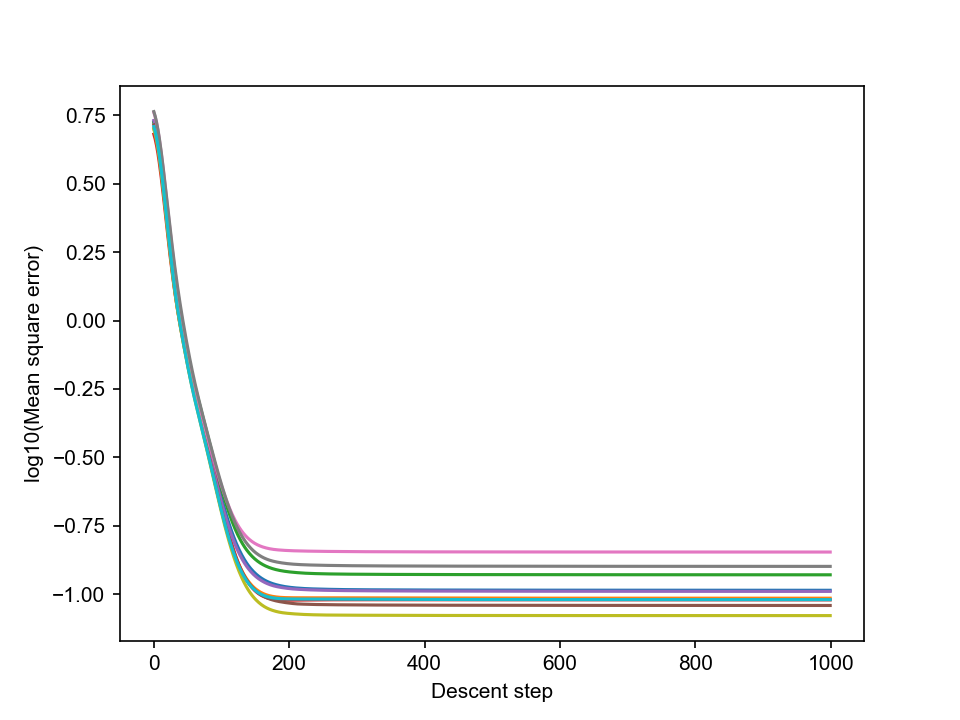

In [8]:
iq4 = ImageQuant2(img=imgs_l50r, roi=rois_l50r, cytbg=cytbg)
iq4.calibrate_membrane(**kwargs_dict)
iq4.plot_losses(log=True)

### Calibration 5 (WT single copy)

  0%|                                                                                                                                            | 0/1000 [00:00<?, ?it/s]

  0%|▏                                                                                                                                   | 1/1000 [00:00<14:34,  1.14it/s]

  1%|█▏                                                                                                                                  | 9/1000 [00:00<01:22, 12.03it/s]

  2%|██▏                                                                                                                                | 17/1000 [00:01<00:42, 23.16it/s]

  2%|███▎                                                                                                                               | 25/1000 [00:01<00:28, 33.80it/s]

  3%|████▎                                                                                                                              | 33/1000 [00:01<00:22, 42.78it/s]

  4%|█████▌                                                                                                                             | 42/1000 [00:01<00:18, 53.12it/s]

  5%|██████▋                                                                                                                            | 51/1000 [00:01<00:15, 60.38it/s]

  6%|███████▋                                                                                                                           | 59/1000 [00:01<00:15, 62.27it/s]

  7%|████████▊                                                                                                                          | 67/1000 [00:01<00:14, 66.35it/s]

  8%|█████████▊                                                                                                                         | 75/1000 [00:01<00:13, 68.42it/s]

  8%|██████████▊                                                                                                                        | 83/1000 [00:01<00:13, 69.79it/s]

  9%|███████████▉                                                                                                                       | 91/1000 [00:02<00:12, 71.88it/s]

 10%|████████████▉                                                                                                                      | 99/1000 [00:02<00:12, 74.03it/s]

 11%|█████████████▉                                                                                                                    | 107/1000 [00:02<00:11, 75.63it/s]

 12%|███████████████                                                                                                                   | 116/1000 [00:02<00:11, 77.08it/s]

 12%|████████████████▎                                                                                                                 | 125/1000 [00:02<00:11, 79.11it/s]

 13%|█████████████████▎                                                                                                                | 133/1000 [00:02<00:11, 77.13it/s]

 14%|██████████████████▍                                                                                                               | 142/1000 [00:02<00:10, 78.20it/s]

 15%|███████████████████▋                                                                                                              | 151/1000 [00:02<00:10, 79.46it/s]

 16%|████████████████████▋                                                                                                             | 159/1000 [00:02<00:10, 77.14it/s]

 17%|█████████████████████▋                                                                                                            | 167/1000 [00:03<00:10, 77.76it/s]

 18%|██████████████████████▉                                                                                                           | 176/1000 [00:03<00:10, 78.52it/s]

 18%|████████████████████████                                                                                                          | 185/1000 [00:03<00:10, 79.28it/s]

 19%|█████████████████████████                                                                                                         | 193/1000 [00:03<00:10, 79.17it/s]

 20%|██████████████████████████▎                                                                                                       | 202/1000 [00:03<00:09, 80.16it/s]

 21%|███████████████████████████▍                                                                                                      | 211/1000 [00:03<00:09, 80.93it/s]

 22%|████████████████████████████▌                                                                                                     | 220/1000 [00:03<00:09, 80.84it/s]

 23%|█████████████████████████████▊                                                                                                    | 229/1000 [00:03<00:09, 81.29it/s]

 24%|██████████████████████████████▉                                                                                                   | 238/1000 [00:03<00:09, 81.44it/s]

 25%|████████████████████████████████                                                                                                  | 247/1000 [00:04<00:09, 81.19it/s]

 26%|█████████████████████████████████▎                                                                                                | 256/1000 [00:04<00:08, 83.22it/s]

 26%|██████████████████████████████████▍                                                                                               | 265/1000 [00:04<00:08, 84.76it/s]

 27%|███████████████████████████████████▌                                                                                              | 274/1000 [00:04<00:08, 85.90it/s]

 28%|████████████████████████████████████▊                                                                                             | 283/1000 [00:04<00:08, 86.59it/s]

 29%|██████████████████████████████████████▏                                                                                           | 294/1000 [00:04<00:07, 91.98it/s]

 30%|███████████████████████████████████████▌                                                                                          | 304/1000 [00:04<00:07, 87.77it/s]

 31%|████████████████████████████████████████▊                                                                                         | 314/1000 [00:04<00:07, 89.62it/s]

 32%|██████████████████████████████████████████▎                                                                                       | 325/1000 [00:04<00:07, 93.36it/s]

 34%|███████████████████████████████████████████▌                                                                                      | 335/1000 [00:04<00:07, 93.83it/s]

 34%|████████████████████████████████████████████▊                                                                                     | 345/1000 [00:05<00:06, 93.63it/s]

 36%|██████████████████████████████████████████████▎                                                                                   | 356/1000 [00:05<00:06, 96.70it/s]

 37%|███████████████████████████████████████████████▎                                                                                 | 367/1000 [00:05<00:06, 100.13it/s]

 38%|████████████████████████████████████████████████▉                                                                                | 379/1000 [00:05<00:05, 105.86it/s]

 39%|██████████████████████████████████████████████████▎                                                                              | 390/1000 [00:05<00:05, 103.96it/s]

 40%|███████████████████████████████████████████████████▉                                                                             | 403/1000 [00:05<00:05, 108.42it/s]

 42%|█████████████████████████████████████████████████████▌                                                                           | 415/1000 [00:05<00:05, 110.39it/s]

 43%|███████████████████████████████████████████████████████                                                                          | 427/1000 [00:05<00:05, 108.79it/s]

 44%|████████████████████████████████████████████████████████▌                                                                        | 438/1000 [00:05<00:05, 108.47it/s]

 45%|██████████████████████████████████████████████████████████▎                                                                       | 449/1000 [00:06<00:05, 96.05it/s]

 46%|███████████████████████████████████████████████████████████▍                                                                     | 461/1000 [00:06<00:05, 101.03it/s]

 47%|█████████████████████████████████████████████████████████████▏                                                                   | 474/1000 [00:06<00:04, 107.18it/s]

 49%|██████████████████████████████████████████████████████████████▋                                                                  | 486/1000 [00:06<00:04, 109.96it/s]

 50%|████████████████████████████████████████████████████████████████▎                                                                | 499/1000 [00:06<00:04, 115.11it/s]

 51%|██████████████████████████████████████████████████████████████████▏                                                              | 513/1000 [00:06<00:04, 120.39it/s]

 53%|███████████████████████████████████████████████████████████████████▉                                                             | 527/1000 [00:06<00:03, 123.40it/s]

 54%|█████████████████████████████████████████████████████████████████████▋                                                           | 540/1000 [00:06<00:03, 122.46it/s]

 55%|███████████████████████████████████████████████████████████████████████▎                                                         | 553/1000 [00:06<00:03, 123.60it/s]

 57%|█████████████████████████████████████████████████████████████████████████                                                        | 566/1000 [00:07<00:03, 123.82it/s]

 58%|██████████████████████████████████████████████████████████████████████████▋                                                      | 579/1000 [00:07<00:03, 121.57it/s]

 59%|████████████████████████████████████████████████████████████████████████████▎                                                    | 592/1000 [00:07<00:03, 121.07it/s]

 60%|██████████████████████████████████████████████████████████████████████████████                                                   | 605/1000 [00:07<00:03, 119.02it/s]

 62%|███████████████████████████████████████████████████████████████████████████████▋                                                 | 618/1000 [00:07<00:03, 120.27it/s]

 63%|█████████████████████████████████████████████████████████████████████████████████▍                                               | 631/1000 [00:07<00:03, 120.90it/s]

 64%|███████████████████████████████████████████████████████████████████████████████████                                              | 644/1000 [00:07<00:02, 122.58it/s]

 66%|████████████████████████████████████████████████████████████████████████████████████▊                                            | 657/1000 [00:07<00:02, 123.64it/s]

 67%|██████████████████████████████████████████████████████████████████████████████████████▍                                          | 670/1000 [00:07<00:02, 124.16it/s]

 68%|████████████████████████████████████████████████████████████████████████████████████████                                         | 683/1000 [00:07<00:02, 124.89it/s]

 70%|█████████████████████████████████████████████████████████████████████████████████████████▉                                       | 697/1000 [00:08<00:02, 127.87it/s]

 71%|███████████████████████████████████████████████████████████████████████████████████████████▋                                     | 711/1000 [00:08<00:02, 129.72it/s]

 72%|█████████████████████████████████████████████████████████████████████████████████████████████▍                                   | 724/1000 [00:08<00:02, 128.13it/s]

 74%|███████████████████████████████████████████████████████████████████████████████████████████████                                  | 737/1000 [00:08<00:02, 126.83it/s]

 75%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                | 751/1000 [00:08<00:01, 128.74it/s]

 76%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                              | 764/1000 [00:08<00:01, 126.43it/s]

 78%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                            | 777/1000 [00:08<00:01, 125.80it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉                           | 790/1000 [00:08<00:01, 126.09it/s]

 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋                         | 804/1000 [00:08<00:01, 129.12it/s]

 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍                       | 817/1000 [00:09<00:01, 128.58it/s]

 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████                      | 830/1000 [00:09<00:01, 124.79it/s]

 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                    | 843/1000 [00:09<00:01, 123.55it/s]

 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 856/1000 [00:09<00:01, 124.60it/s]

 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████                 | 869/1000 [00:09<00:01, 125.50it/s]

 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 882/1000 [00:09<00:00, 125.66it/s]

 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍             | 895/1000 [00:09<00:00, 126.24it/s]

 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 908/1000 [00:09<00:00, 126.87it/s]

 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 921/1000 [00:09<00:00, 125.28it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 935/1000 [00:09<00:00, 127.71it/s]

 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 949/1000 [00:10<00:00, 127.94it/s]

 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 962/1000 [00:10<00:00, 128.43it/s]

 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 975/1000 [00:10<00:00, 124.39it/s]

 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 988/1000 [00:10<00:00, 124.74it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 95.47it/s]

(<Figure size 960x720 with 1 Axes>,
 <Axes: xlabel='Descent step', ylabel='log10(Mean square error)'>)

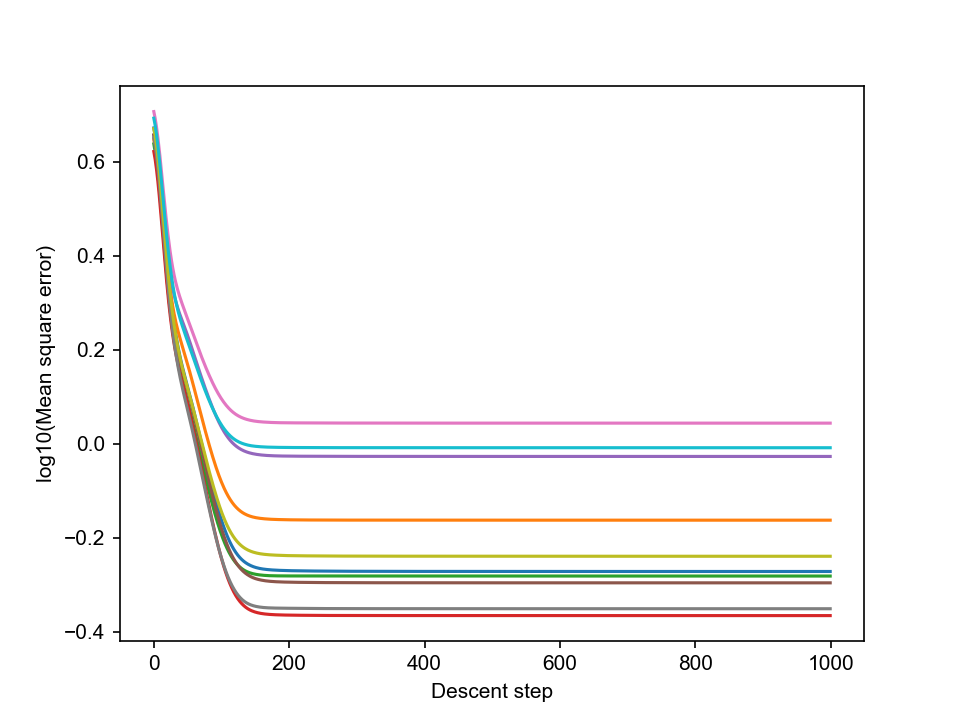

In [9]:
iq5 = ImageQuant2(img=imgs_het, roi=rois_het, cytbg=cytbg)
iq5.calibrate_membrane(**kwargs_dict)
iq5.plot_losses(log=True)

### Calibration 6 (Full dataset)

  0%|                                                                                                                                            | 0/1000 [00:00<?, ?it/s]

  0%|▏                                                                                                                                   | 1/1000 [00:00<12:56,  1.29it/s]

  1%|▊                                                                                                                                   | 6/1000 [00:00<01:55,  8.60it/s]

  1%|█▍                                                                                                                                 | 11/1000 [00:01<01:03, 15.49it/s]

  2%|██                                                                                                                                 | 16/1000 [00:01<00:45, 21.59it/s]

  2%|██▊                                                                                                                                | 21/1000 [00:01<00:36, 27.17it/s]

  3%|███▍                                                                                                                               | 26/1000 [00:01<00:30, 31.44it/s]

  3%|████                                                                                                                               | 31/1000 [00:01<00:27, 35.02it/s]

  4%|████▋                                                                                                                              | 36/1000 [00:01<00:25, 37.71it/s]

  4%|█████▎                                                                                                                             | 41/1000 [00:01<00:23, 40.21it/s]

  5%|██████                                                                                                                             | 46/1000 [00:01<00:22, 42.16it/s]

  5%|██████▋                                                                                                                            | 51/1000 [00:01<00:21, 43.37it/s]

  6%|███████▎                                                                                                                           | 56/1000 [00:02<00:21, 44.05it/s]

  6%|███████▉                                                                                                                           | 61/1000 [00:02<00:20, 45.08it/s]

  7%|████████▋                                                                                                                          | 66/1000 [00:02<00:21, 44.01it/s]

  7%|█████████▎                                                                                                                         | 71/1000 [00:02<00:20, 44.81it/s]

  8%|█████████▉                                                                                                                         | 76/1000 [00:02<00:20, 45.44it/s]

  8%|██████████▌                                                                                                                        | 81/1000 [00:02<00:20, 44.57it/s]

  9%|███████████▎                                                                                                                       | 86/1000 [00:02<00:20, 43.68it/s]

  9%|███████████▉                                                                                                                       | 91/1000 [00:02<00:20, 44.38it/s]

 10%|████████████▌                                                                                                                      | 96/1000 [00:02<00:20, 43.95it/s]

 10%|█████████████▏                                                                                                                    | 101/1000 [00:03<00:20, 42.92it/s]

 11%|█████████████▊                                                                                                                    | 106/1000 [00:03<00:21, 42.47it/s]

 11%|██████████████▍                                                                                                                   | 111/1000 [00:03<00:21, 41.53it/s]

 12%|███████████████                                                                                                                   | 116/1000 [00:03<00:21, 41.50it/s]

 12%|███████████████▋                                                                                                                  | 121/1000 [00:03<00:21, 41.30it/s]

 13%|████████████████▍                                                                                                                 | 126/1000 [00:03<00:21, 41.47it/s]

 13%|█████████████████                                                                                                                 | 131/1000 [00:03<00:21, 41.26it/s]

 14%|█████████████████▋                                                                                                                | 136/1000 [00:03<00:21, 40.94it/s]

 14%|██████████████████▎                                                                                                               | 141/1000 [00:04<00:21, 40.85it/s]

 15%|██████████████████▉                                                                                                               | 146/1000 [00:04<00:20, 41.06it/s]

 15%|███████████████████▋                                                                                                              | 151/1000 [00:04<00:20, 41.13it/s]

 16%|████████████████████▎                                                                                                             | 156/1000 [00:04<00:20, 40.84it/s]

 16%|████████████████████▉                                                                                                             | 161/1000 [00:04<00:20, 40.58it/s]

 17%|█████████████████████▌                                                                                                            | 166/1000 [00:04<00:20, 40.98it/s]

 17%|██████████████████████▏                                                                                                           | 171/1000 [00:04<00:20, 40.62it/s]

 18%|██████████████████████▉                                                                                                           | 176/1000 [00:04<00:20, 40.78it/s]

 18%|███████████████████████▌                                                                                                          | 181/1000 [00:04<00:19, 41.55it/s]

 19%|████████████████████████▏                                                                                                         | 186/1000 [00:05<00:19, 41.24it/s]

 19%|████████████████████████▊                                                                                                         | 191/1000 [00:05<00:19, 41.72it/s]

 20%|█████████████████████████▍                                                                                                        | 196/1000 [00:05<00:19, 42.17it/s]

 20%|██████████████████████████▏                                                                                                       | 201/1000 [00:05<00:19, 40.05it/s]

 21%|██████████████████████████▊                                                                                                       | 206/1000 [00:05<00:20, 38.73it/s]

 21%|███████████████████████████▍                                                                                                      | 211/1000 [00:05<00:19, 39.64it/s]

 22%|████████████████████████████                                                                                                      | 216/1000 [00:05<00:19, 40.48it/s]

 22%|████████████████████████████▋                                                                                                     | 221/1000 [00:05<00:19, 40.89it/s]

 23%|█████████████████████████████▍                                                                                                    | 226/1000 [00:06<00:18, 41.62it/s]

 23%|██████████████████████████████                                                                                                    | 231/1000 [00:06<00:18, 42.09it/s]

 24%|██████████████████████████████▋                                                                                                   | 236/1000 [00:06<00:18, 42.10it/s]

 24%|███████████████████████████████▎                                                                                                  | 241/1000 [00:06<00:17, 42.21it/s]

 25%|███████████████████████████████▉                                                                                                  | 246/1000 [00:06<00:17, 42.32it/s]

 25%|████████████████████████████████▋                                                                                                 | 251/1000 [00:06<00:17, 42.42it/s]

 26%|█████████████████████████████████▎                                                                                                | 256/1000 [00:06<00:17, 42.86it/s]

 26%|█████████████████████████████████▉                                                                                                | 261/1000 [00:06<00:17, 43.16it/s]

 27%|██████████████████████████████████▌                                                                                               | 266/1000 [00:07<00:16, 43.20it/s]

 27%|███████████████████████████████████▏                                                                                              | 271/1000 [00:07<00:16, 43.32it/s]

 28%|███████████████████████████████████▉                                                                                              | 276/1000 [00:07<00:16, 43.30it/s]

 28%|████████████████████████████████████▌                                                                                             | 281/1000 [00:07<00:16, 43.31it/s]

 29%|█████████████████████████████████████▏                                                                                            | 286/1000 [00:07<00:16, 43.22it/s]

 29%|█████████████████████████████████████▊                                                                                            | 291/1000 [00:07<00:16, 43.18it/s]

 30%|██████████████████████████████████████▍                                                                                           | 296/1000 [00:07<00:16, 43.13it/s]

 30%|███████████████████████████████████████▏                                                                                          | 301/1000 [00:07<00:16, 41.69it/s]

 31%|███████████████████████████████████████▊                                                                                          | 306/1000 [00:07<00:16, 41.84it/s]

 31%|████████████████████████████████████████▍                                                                                         | 311/1000 [00:08<00:16, 42.01it/s]

 32%|█████████████████████████████████████████                                                                                         | 316/1000 [00:08<00:16, 42.15it/s]

 32%|█████████████████████████████████████████▋                                                                                        | 321/1000 [00:08<00:16, 41.86it/s]

 33%|██████████████████████████████████████████▍                                                                                       | 326/1000 [00:08<00:15, 42.85it/s]

 33%|███████████████████████████████████████████                                                                                       | 331/1000 [00:08<00:15, 42.54it/s]

 34%|███████████████████████████████████████████▋                                                                                      | 336/1000 [00:08<00:15, 41.75it/s]

 34%|████████████████████████████████████████████▎                                                                                     | 341/1000 [00:08<00:15, 42.09it/s]

 35%|████████████████████████████████████████████▉                                                                                     | 346/1000 [00:08<00:15, 42.20it/s]

 35%|█████████████████████████████████████████████▋                                                                                    | 351/1000 [00:09<00:15, 42.52it/s]

 36%|██████████████████████████████████████████████▎                                                                                   | 356/1000 [00:09<00:15, 42.27it/s]

 36%|██████████████████████████████████████████████▉                                                                                   | 361/1000 [00:09<00:15, 41.67it/s]

 37%|███████████████████████████████████████████████▌                                                                                  | 366/1000 [00:09<00:15, 42.02it/s]

 37%|████████████████████████████████████████████████▏                                                                                 | 371/1000 [00:09<00:15, 41.68it/s]

 38%|████████████████████████████████████████████████▉                                                                                 | 376/1000 [00:09<00:14, 42.14it/s]

 38%|█████████████████████████████████████████████████▌                                                                                | 381/1000 [00:09<00:14, 42.38it/s]

 39%|██████████████████████████████████████████████████▏                                                                               | 386/1000 [00:09<00:14, 42.67it/s]

 39%|██████████████████████████████████████████████████▊                                                                               | 391/1000 [00:09<00:14, 42.83it/s]

 40%|███████████████████████████████████████████████████▍                                                                              | 396/1000 [00:10<00:14, 42.80it/s]

 40%|████████████████████████████████████████████████████▏                                                                             | 401/1000 [00:10<00:14, 42.50it/s]

 41%|████████████████████████████████████████████████████▊                                                                             | 406/1000 [00:10<00:13, 42.48it/s]

 41%|█████████████████████████████████████████████████████▍                                                                            | 411/1000 [00:10<00:13, 42.45it/s]

 42%|██████████████████████████████████████████████████████                                                                            | 416/1000 [00:10<00:13, 42.32it/s]

 42%|██████████████████████████████████████████████████████▋                                                                           | 421/1000 [00:10<00:13, 42.13it/s]

 43%|███████████████████████████████████████████████████████▍                                                                          | 426/1000 [00:10<00:13, 42.60it/s]

 43%|████████████████████████████████████████████████████████                                                                          | 431/1000 [00:10<00:13, 42.83it/s]

 44%|████████████████████████████████████████████████████████▋                                                                         | 436/1000 [00:11<00:13, 42.99it/s]

 44%|█████████████████████████████████████████████████████████▎                                                                        | 441/1000 [00:11<00:13, 42.98it/s]

 45%|█████████████████████████████████████████████████████████▉                                                                        | 446/1000 [00:11<00:12, 43.08it/s]

 45%|██████████████████████████████████████████████████████████▋                                                                       | 451/1000 [00:11<00:12, 42.95it/s]

 46%|███████████████████████████████████████████████████████████▎                                                                      | 456/1000 [00:11<00:13, 41.76it/s]

 46%|███████████████████████████████████████████████████████████▉                                                                      | 461/1000 [00:11<00:12, 42.08it/s]

 47%|████████████████████████████████████████████████████████████▌                                                                     | 466/1000 [00:11<00:12, 42.08it/s]

 47%|█████████████████████████████████████████████████████████████▏                                                                    | 471/1000 [00:11<00:12, 42.32it/s]

 48%|█████████████████████████████████████████████████████████████▉                                                                    | 476/1000 [00:11<00:11, 43.92it/s]

 48%|██████████████████████████████████████████████████████████████▌                                                                   | 481/1000 [00:12<00:11, 45.12it/s]

 49%|███████████████████████████████████████████████████████████████▏                                                                  | 486/1000 [00:12<00:11, 45.71it/s]

 49%|███████████████████████████████████████████████████████████████▊                                                                  | 491/1000 [00:12<00:11, 46.10it/s]

 50%|████████████████████████████████████████████████████████████████▍                                                                 | 496/1000 [00:12<00:10, 46.86it/s]

 50%|█████████████████████████████████████████████████████████████████▏                                                                | 501/1000 [00:12<00:10, 45.67it/s]

 51%|█████████████████████████████████████████████████████████████████▊                                                                | 506/1000 [00:12<00:11, 43.92it/s]

 51%|██████████████████████████████████████████████████████████████████▍                                                               | 511/1000 [00:12<00:11, 43.72it/s]

 52%|███████████████████████████████████████████████████████████████████                                                               | 516/1000 [00:12<00:11, 42.98it/s]

 52%|███████████████████████████████████████████████████████████████████▋                                                              | 521/1000 [00:12<00:11, 42.80it/s]

 53%|████████████████████████████████████████████████████████████████████▍                                                             | 526/1000 [00:13<00:11, 42.50it/s]

 53%|█████████████████████████████████████████████████████████████████████                                                             | 531/1000 [00:13<00:11, 42.22it/s]

 54%|█████████████████████████████████████████████████████████████████████▋                                                            | 536/1000 [00:13<00:10, 42.46it/s]

 54%|██████████████████████████████████████████████████████████████████████▎                                                           | 541/1000 [00:13<00:10, 42.61it/s]

 55%|██████████████████████████████████████████████████████████████████████▉                                                           | 546/1000 [00:13<00:11, 41.17it/s]

 55%|███████████████████████████████████████████████████████████████████████▋                                                          | 551/1000 [00:13<00:10, 41.76it/s]

 56%|████████████████████████████████████████████████████████████████████████▎                                                         | 556/1000 [00:13<00:10, 43.51it/s]

 56%|████████████████████████████████████████████████████████████████████████▉                                                         | 561/1000 [00:13<00:09, 44.91it/s]

 57%|█████████████████████████████████████████████████████████████████████████▌                                                        | 566/1000 [00:13<00:09, 45.81it/s]

 57%|██████████████████████████████████████████████████████████████████████████▏                                                       | 571/1000 [00:14<00:10, 40.52it/s]

 58%|██████████████████████████████████████████████████████████████████████████▉                                                       | 576/1000 [00:14<00:09, 42.53it/s]

 58%|███████████████████████████████████████████████████████████████████████████▌                                                      | 581/1000 [00:14<00:09, 44.23it/s]

 59%|████████████████████████████████████████████████████████████████████████████▏                                                     | 586/1000 [00:14<00:09, 45.51it/s]

 59%|████████████████████████████████████████████████████████████████████████████▊                                                     | 591/1000 [00:14<00:08, 46.10it/s]

 60%|█████████████████████████████████████████████████████████████████████████████▍                                                    | 596/1000 [00:14<00:08, 45.80it/s]

 60%|██████████████████████████████████████████████████████████████████████████████▏                                                   | 601/1000 [00:14<00:08, 46.58it/s]

 61%|██████████████████████████████████████████████████████████████████████████████▊                                                   | 606/1000 [00:14<00:08, 46.85it/s]

 61%|███████████████████████████████████████████████████████████████████████████████▍                                                  | 611/1000 [00:14<00:08, 47.52it/s]

 62%|████████████████████████████████████████████████████████████████████████████████                                                  | 616/1000 [00:15<00:08, 47.20it/s]

 62%|████████████████████████████████████████████████████████████████████████████████▋                                                 | 621/1000 [00:15<00:08, 46.87it/s]

 63%|█████████████████████████████████████████████████████████████████████████████████▍                                                | 626/1000 [00:15<00:07, 47.11it/s]

 63%|██████████████████████████████████████████████████████████████████████████████████                                                | 631/1000 [00:15<00:07, 47.36it/s]

 64%|██████████████████████████████████████████████████████████████████████████████████▋                                               | 636/1000 [00:15<00:07, 46.33it/s]

 64%|███████████████████████████████████████████████████████████████████████████████████▎                                              | 641/1000 [00:15<00:07, 46.46it/s]

 65%|███████████████████████████████████████████████████████████████████████████████████▉                                              | 646/1000 [00:15<00:07, 46.25it/s]

 65%|████████████████████████████████████████████████████████████████████████████████████▋                                             | 651/1000 [00:15<00:07, 45.70it/s]

 66%|█████████████████████████████████████████████████████████████████████████████████████▎                                            | 656/1000 [00:15<00:07, 46.46it/s]

 66%|█████████████████████████████████████████████████████████████████████████████████████▉                                            | 661/1000 [00:16<00:07, 45.14it/s]

 67%|██████████████████████████████████████████████████████████████████████████████████████▌                                           | 666/1000 [00:16<00:07, 44.53it/s]

 67%|███████████████████████████████████████████████████████████████████████████████████████▏                                          | 671/1000 [00:16<00:07, 44.13it/s]

 68%|███████████████████████████████████████████████████████████████████████████████████████▉                                          | 676/1000 [00:16<00:07, 44.00it/s]

 68%|████████████████████████████████████████████████████████████████████████████████████████▌                                         | 681/1000 [00:16<00:07, 43.82it/s]

 69%|█████████████████████████████████████████████████████████████████████████████████████████▏                                        | 686/1000 [00:16<00:07, 44.68it/s]

 69%|█████████████████████████████████████████████████████████████████████████████████████████▊                                        | 691/1000 [00:16<00:07, 43.34it/s]

 70%|██████████████████████████████████████████████████████████████████████████████████████████▍                                       | 696/1000 [00:16<00:07, 43.24it/s]

 70%|███████████████████████████████████████████████████████████████████████████████████████████▏                                      | 701/1000 [00:16<00:06, 43.16it/s]

 71%|███████████████████████████████████████████████████████████████████████████████████████████▊                                      | 706/1000 [00:17<00:06, 43.26it/s]

 71%|████████████████████████████████████████████████████████████████████████████████████████████▍                                     | 711/1000 [00:17<00:06, 43.26it/s]

 72%|█████████████████████████████████████████████████████████████████████████████████████████████                                     | 716/1000 [00:17<00:06, 43.43it/s]

 72%|█████████████████████████████████████████████████████████████████████████████████████████████▋                                    | 721/1000 [00:17<00:06, 42.90it/s]

 73%|██████████████████████████████████████████████████████████████████████████████████████████████▍                                   | 726/1000 [00:17<00:06, 43.06it/s]

 73%|███████████████████████████████████████████████████████████████████████████████████████████████                                   | 731/1000 [00:17<00:06, 42.81it/s]

 74%|███████████████████████████████████████████████████████████████████████████████████████████████▋                                  | 736/1000 [00:17<00:06, 42.90it/s]

 74%|████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 741/1000 [00:17<00:06, 41.58it/s]

 75%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                 | 746/1000 [00:18<00:06, 41.87it/s]

 75%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                                | 751/1000 [00:18<00:05, 42.08it/s]

 76%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                               | 756/1000 [00:18<00:05, 41.66it/s]

 76%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                               | 761/1000 [00:18<00:05, 41.86it/s]

 77%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                              | 766/1000 [00:18<00:05, 42.15it/s]

 77%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                             | 771/1000 [00:18<00:05, 42.41it/s]

 78%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 776/1000 [00:18<00:05, 41.82it/s]

 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌                            | 781/1000 [00:18<00:05, 42.13it/s]

 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏                           | 786/1000 [00:19<00:05, 42.39it/s]

 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊                           | 791/1000 [00:19<00:04, 42.70it/s]

 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍                          | 796/1000 [00:19<00:04, 42.81it/s]

 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏                         | 801/1000 [00:19<00:04, 42.60it/s]

 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 806/1000 [00:19<00:04, 42.53it/s]

 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍                        | 811/1000 [00:19<00:04, 42.95it/s]

 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                        | 816/1000 [00:19<00:04, 42.90it/s]

 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋                       | 821/1000 [00:19<00:04, 43.03it/s]

 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍                      | 826/1000 [00:19<00:04, 43.49it/s]

 83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                      | 831/1000 [00:20<00:03, 44.74it/s]

 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                     | 836/1000 [00:20<00:03, 45.76it/s]

 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 841/1000 [00:20<00:03, 46.42it/s]

 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 846/1000 [00:20<00:03, 46.67it/s]

 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 851/1000 [00:20<00:03, 47.18it/s]

 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 856/1000 [00:20<00:03, 46.17it/s]

 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 861/1000 [00:20<00:03, 45.25it/s]

 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 866/1000 [00:20<00:03, 44.38it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                | 871/1000 [00:20<00:02, 43.66it/s]

 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                | 876/1000 [00:21<00:02, 43.51it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌               | 881/1000 [00:21<00:02, 42.98it/s]

 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 886/1000 [00:21<00:02, 43.00it/s]

 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 891/1000 [00:21<00:02, 42.68it/s]

 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍             | 896/1000 [00:21<00:02, 42.87it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 901/1000 [00:21<00:02, 42.62it/s]

 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 906/1000 [00:21<00:02, 42.27it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍           | 911/1000 [00:21<00:02, 42.22it/s]

 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████           | 916/1000 [00:21<00:02, 41.92it/s]

 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 921/1000 [00:22<00:01, 42.36it/s]

 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 926/1000 [00:22<00:01, 42.48it/s]

 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████         | 931/1000 [00:22<00:01, 42.64it/s]

 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 936/1000 [00:22<00:01, 42.97it/s]

 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 941/1000 [00:22<00:01, 42.57it/s]

 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 946/1000 [00:22<00:01, 42.18it/s]

 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 951/1000 [00:22<00:01, 43.74it/s]

 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 956/1000 [00:22<00:01, 43.03it/s]

 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 961/1000 [00:23<00:00, 39.99it/s]

 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 966/1000 [00:23<00:00, 39.81it/s]

 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 971/1000 [00:23<00:00, 40.09it/s]

 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 976/1000 [00:23<00:00, 40.19it/s]

 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 981/1000 [00:23<00:00, 40.45it/s]

 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 986/1000 [00:23<00:00, 39.15it/s]

 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 991/1000 [00:23<00:00, 40.30it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 996/1000 [00:23<00:00, 40.70it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:24<00:00, 41.63it/s]

(<Figure size 960x720 with 1 Axes>,
 <Axes: xlabel='Descent step', ylabel='log10(Mean square error)'>)

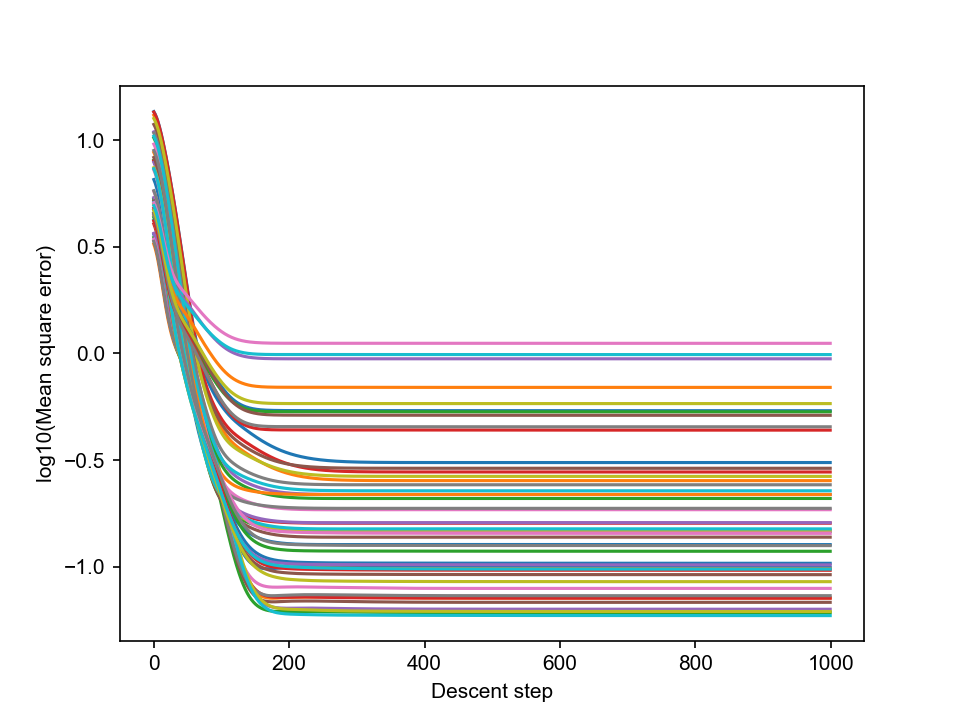

In [10]:
iq6 = ImageQuant2(
    img=imgs_wt + imgs_c56s + imgs_l109r + imgs_l50r + imgs_het,
    roi=rois_wt + rois_c56s + rois_l109r + rois_l50r + rois_het,
    cytbg=cytbg,
)
iq6.calibrate_membrane(**kwargs_dict)
iq6.plot_losses(log=True)

### View results

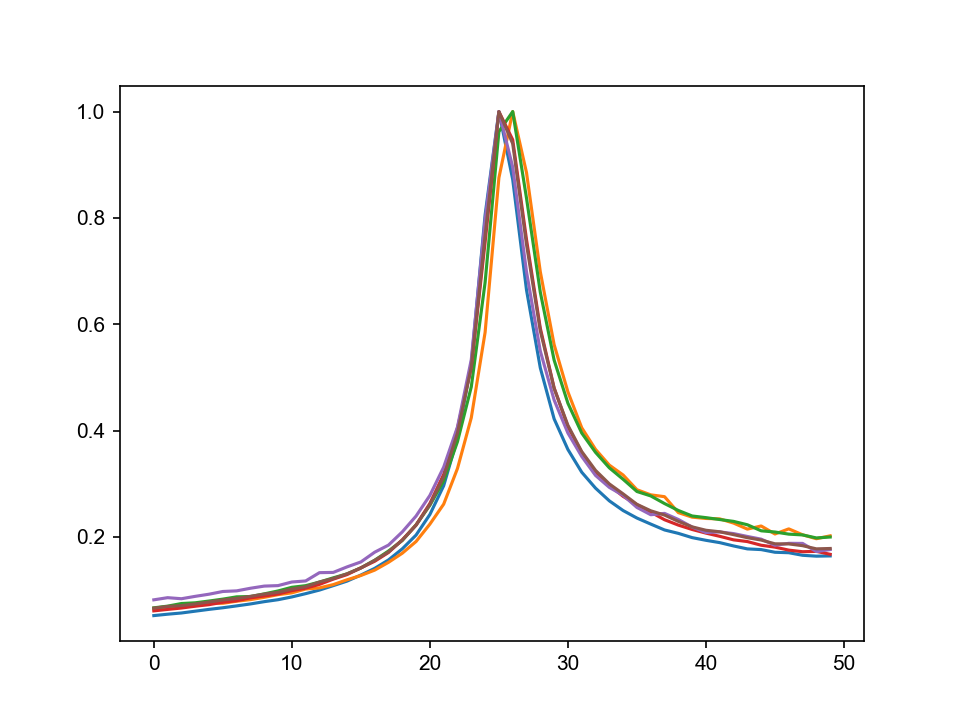

In [11]:
fig, ax = plt.subplots()
ax.plot(iq1.membg.T / np.max(iq1.membg))
ax.plot(iq2.membg.T / np.max(iq2.membg))
ax.plot(iq3.membg.T / np.max(iq3.membg))
ax.plot(iq4.membg.T / np.max(iq4.membg))
ax.plot(iq5.membg.T / np.max(iq5.membg))
ax.plot(iq6.membg.T / np.max(iq6.membg))

In [12]:
# Save
np.savetxt("../../data/calibration_mem1.txt", iq1.membg)
np.savetxt("../../data/calibration_mem2.txt", iq2.membg)
np.savetxt("../../data/calibration_mem3.txt", iq3.membg)
np.savetxt("../../data/calibration_mem4.txt", iq4.membg)
np.savetxt("../../data/calibration_mem5.txt", iq5.membg)
np.savetxt("../../data/calibration_mem6.txt", iq6.membg)